In [3]:
# Cell 1: Markdown
# # Exploratory Data Analysis (EDA) - Bank Credit Card Fraud Data

# This notebook focuses on understanding the `creditcard.csv` dataset, which contains anonymized bank credit card transaction data. Due to the PCA transformation, direct interpretation of `V1` to `V28` is not possible, but we can still analyze their distributions and relationships with the target variable, along with `Time` and `Amount`.

# **Dataset:** `creditcard.csv`

# **Key Areas of Focus:**
# - Data quality (missing values, duplicates, data types)
# - Extreme class imbalance for the target variable (`Class`)
# - Distributions of `Time` and `Amount`
# - How `Time`, `Amount`, and `V` features relate to the target variable (`Class`)

In [4]:
# Cell 2: Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

# Set display options for better viewing of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Define paths
DATA_PATH = '../data/' # Relative path from notebooks/

print("Loading raw dataset...")
try:
    creditcard_df_raw = pd.read_csv(os.path.join(DATA_PATH, 'creditcard .csv'))
    print("Raw creditcard.csv loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading file: {e}. Please ensure the CSV file is in the '{DATA_PATH}' directory.")

Loading raw dataset...
Raw creditcard.csv loaded successfully.


In [5]:
# Cell 3: Markdown
# ## 1. Initial Data Inspection

# Let's get a first look at the data, including its shape, column types, and a few sample rows.

# Cell 4: Code
print("--- creditcard.csv - Initial Info ---")
print("Shape:", creditcard_df_raw.shape)
print("\nHead:\n", creditcard_df_raw.head())
print("\nInfo:\n")
creditcard_df_raw.info()
print("\nDescription:\n", creditcard_df_raw.describe())

--- creditcard.csv - Initial Info ---
Shape: (284807, 31)

Head:
    Time        V1        V2        V3        V4        V5        V6        V7        V8        V9       V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.3401

In [6]:
# Cell 4: Markdown
creditcard_df = creditcard_df_raw.copy()

print("--- creditcard.csv - Cleaning ---")
print("Missing values before handling:\n", creditcard_df.isnull().sum().sum()) # Sum of all missing values
if creditcard_df.isnull().sum().sum() > 0:
    initial_rows_creditcard = creditcard_df.shape[0]
    creditcard_df.dropna(inplace=True)
    print(f"Dropped {initial_rows_creditcard - creditcard_df.shape[0]} rows with missing values.")
else:
    print("No missing values found.")

print("Checking for duplicates...")
initial_rows_creditcard_after_na = creditcard_df.shape[0]
creditcard_df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows_creditcard_after_na - creditcard_df.shape[0]} duplicate rows.")
print(f"creditcard.csv shape after initial cleaning: {creditcard_df.shape}")

--- creditcard.csv - Cleaning ---
Missing values before handling:
 0
No missing values found.
Checking for duplicates...
Removed 1081 duplicate rows.
creditcard.csv shape after initial cleaning: (283726, 31)


Class distribution for 'Class' (target variable):
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


/tmp/ipykernel_331556/893189526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=['skyblue', 'salmon'])


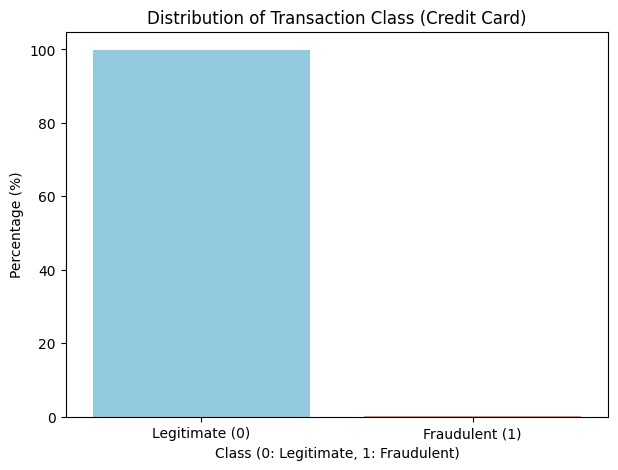


Observation: This dataset is extremely imbalanced, with only 0.1667% fraudulent transactions. This will significantly impact model evaluation and selection.


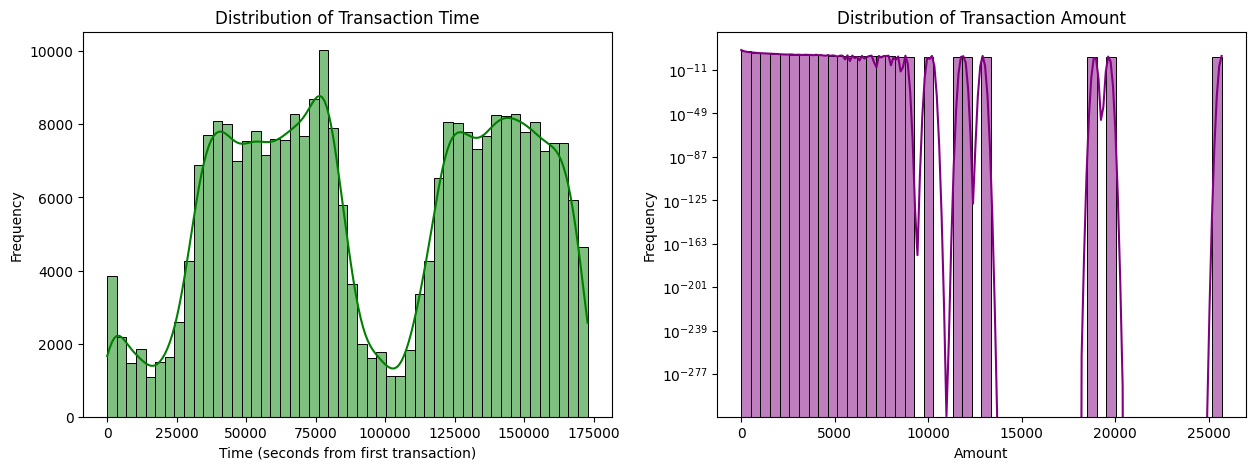

/tmp/ipykernel_331556/893189526.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=creditcard_df, palette=['skyblue', 'salmon'])


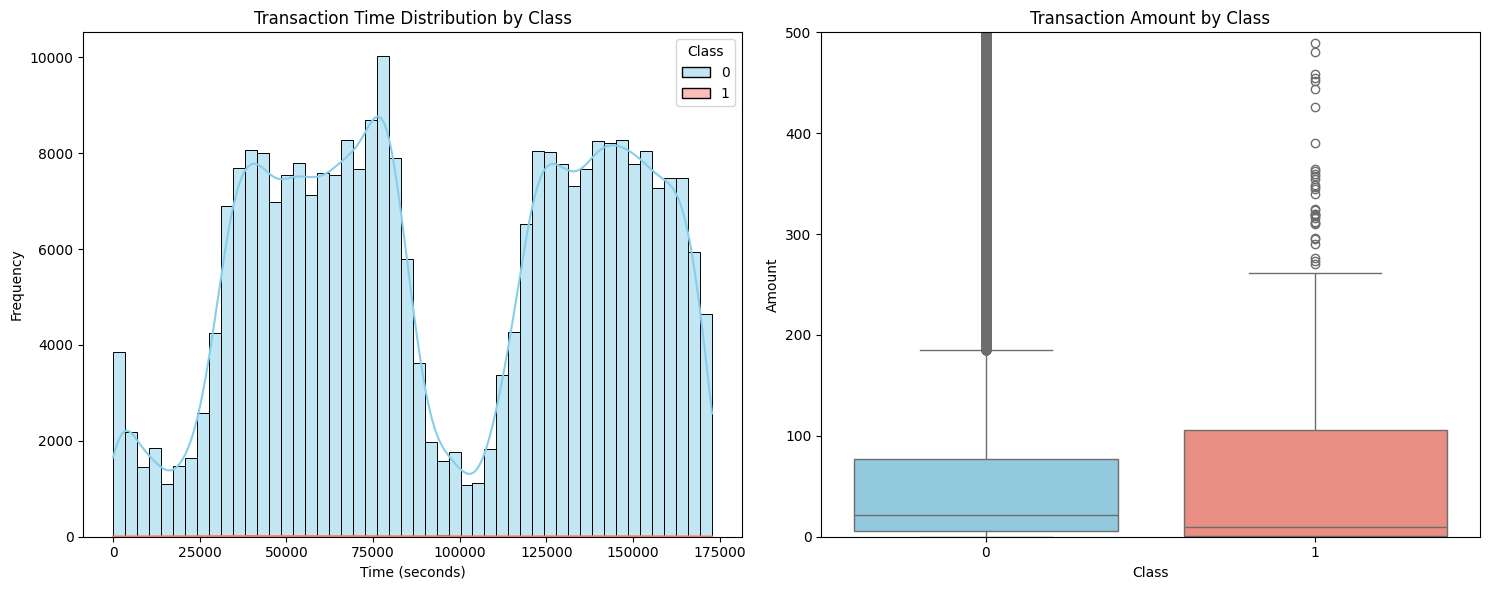

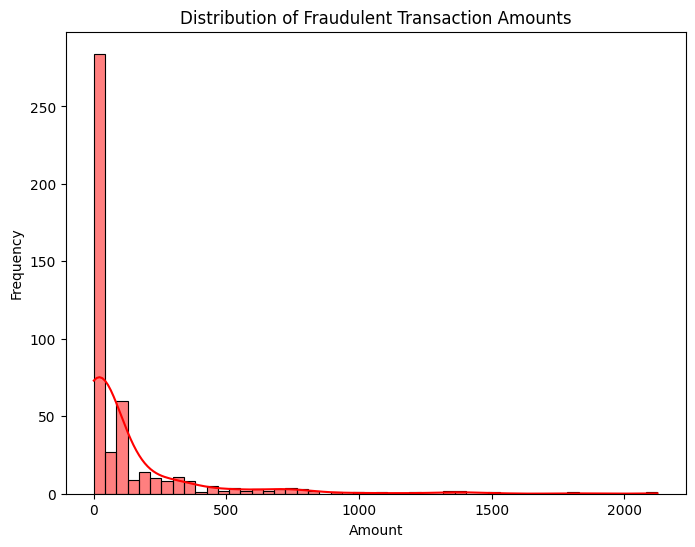

/tmp/ipykernel_331556/893189526.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=creditcard_df, palette=['skyblue', 'salmon'])
/tmp/ipykernel_331556/893189526.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=creditcard_df, palette=['skyblue', 'salmon'])
/tmp/ipykernel_331556/893189526.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=creditcard_df, palette=['skyblue', 'salmon'])
/tmp/ipykernel_331556/893189526.py:69: FutureWarning: 

Passing `palette` without ass

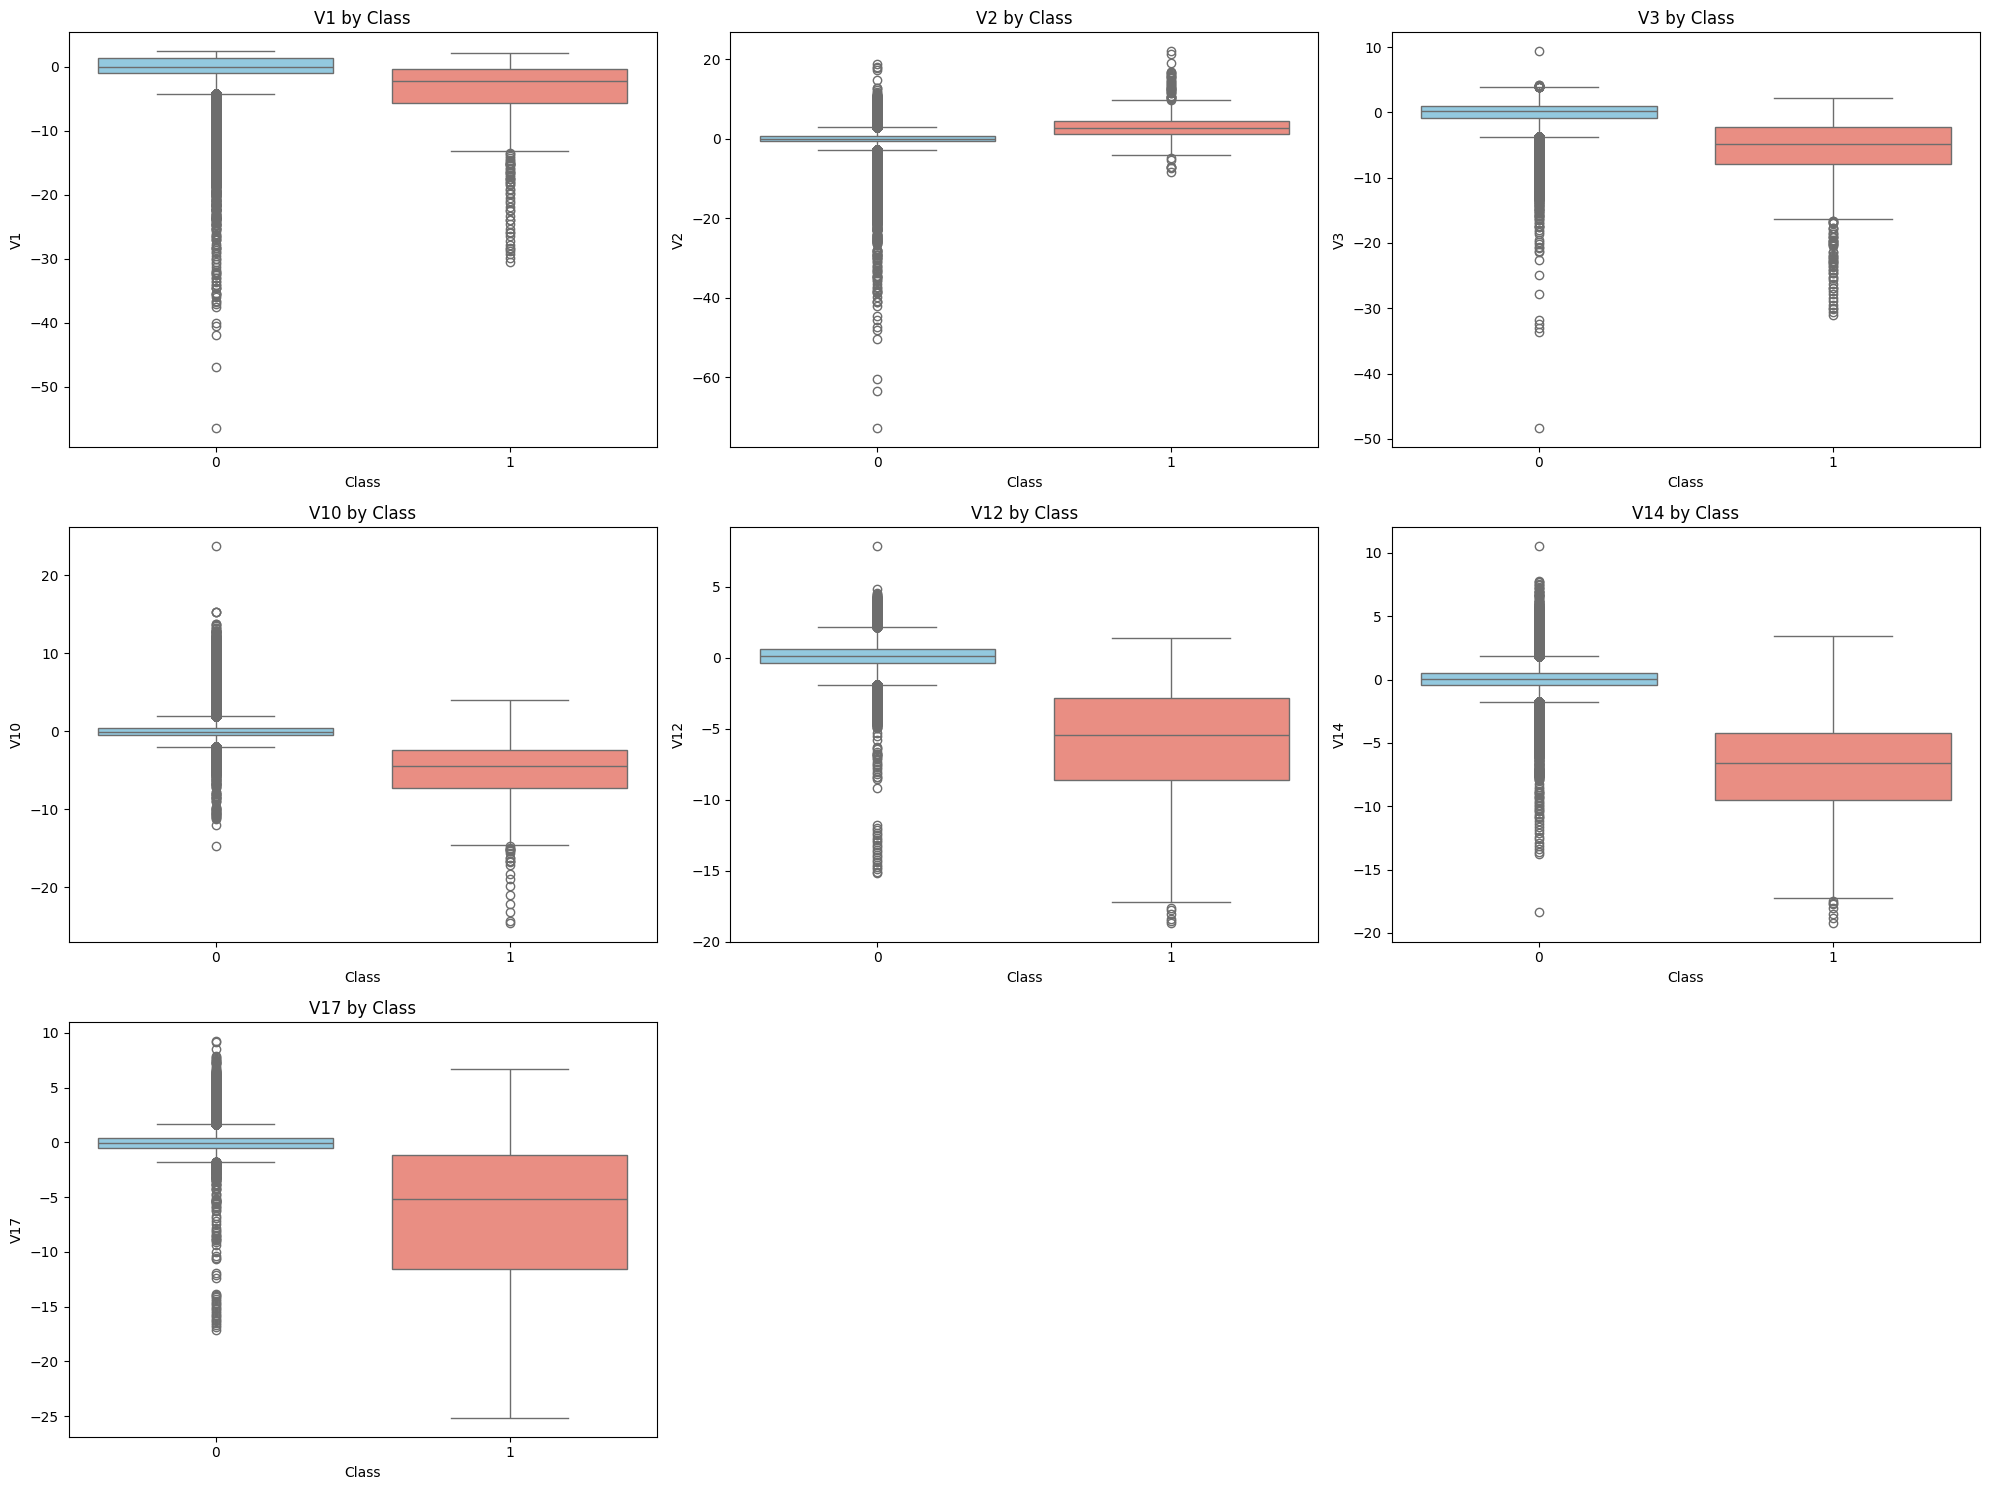

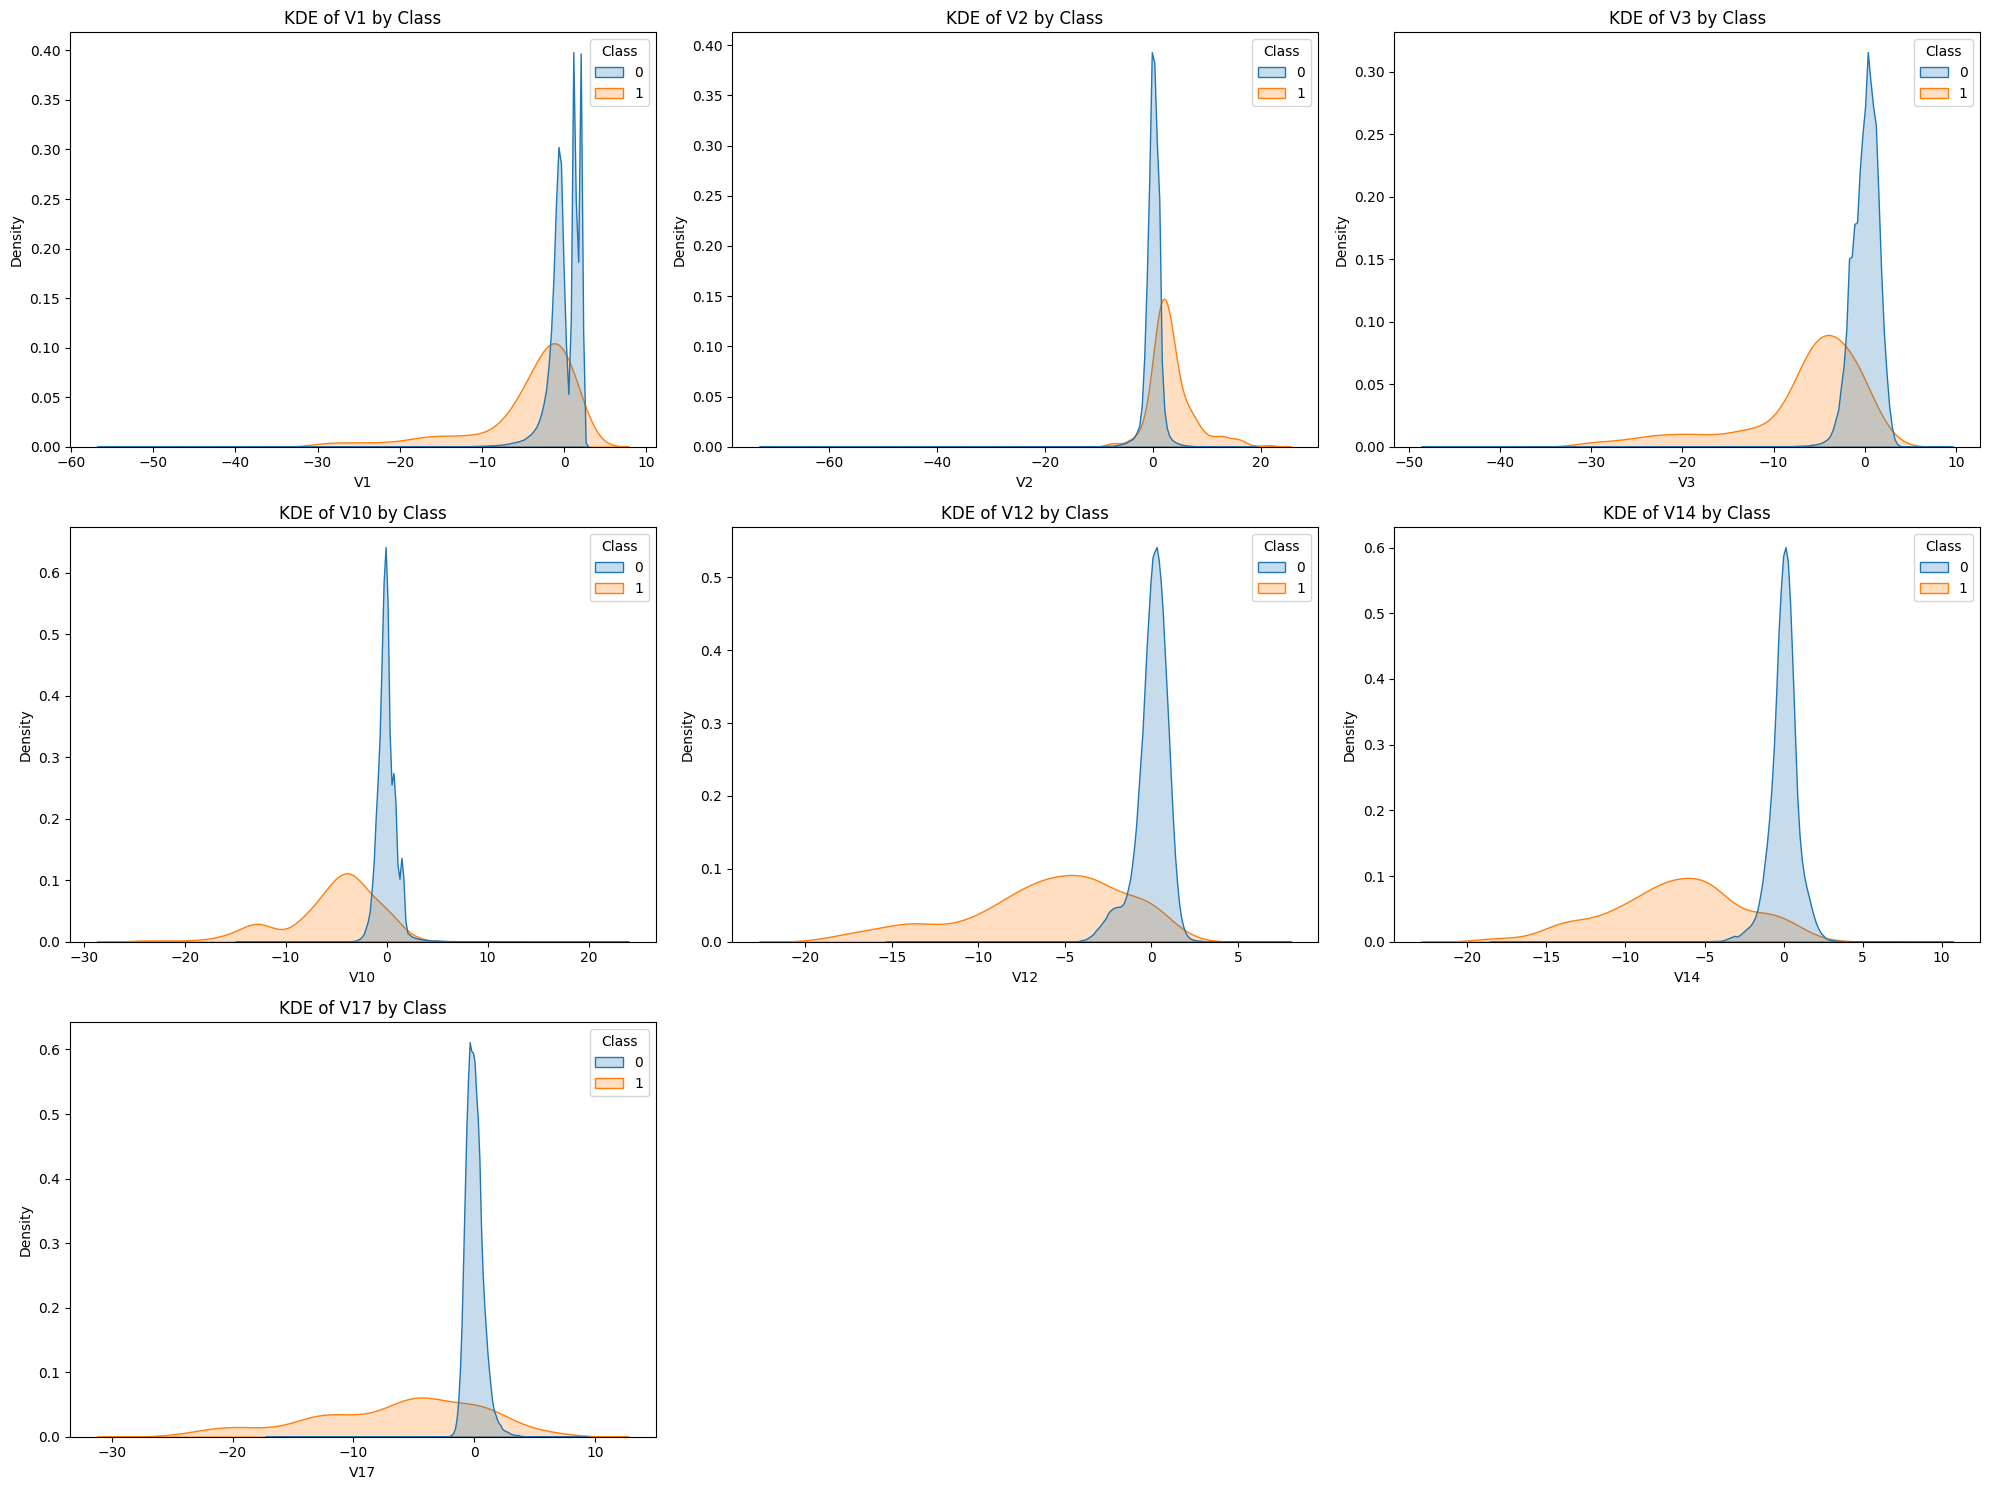

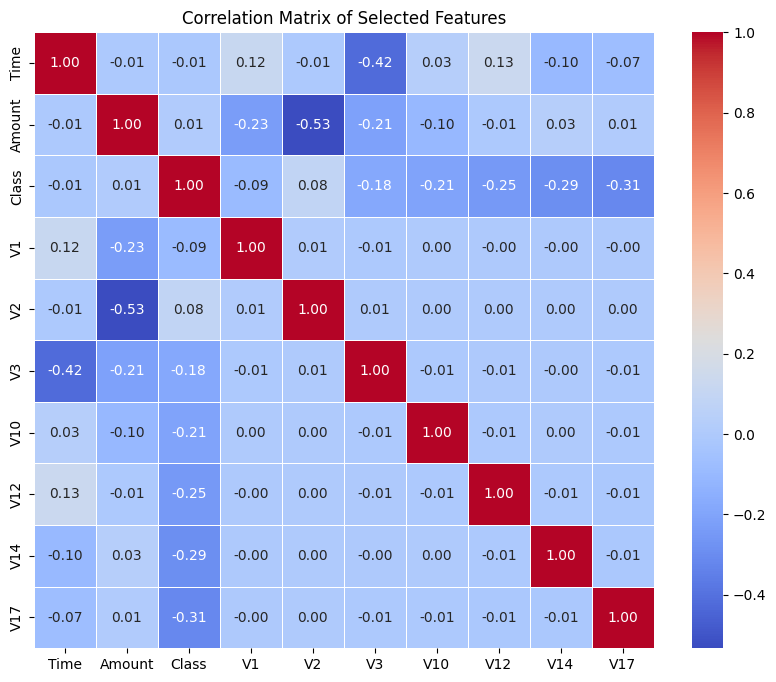

In [7]:


# Cell 5: Code
# 3.1. Class Imbalance Analysis
print("Class distribution for 'Class' (target variable):")
class_distribution = creditcard_df['Class'].value_counts(normalize=True) * 100
print(class_distribution)

plt.figure(figsize=(7, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=['skyblue', 'salmon'])
plt.title('Distribution of Transaction Class (Credit Card)')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraudulent (1)'])
plt.show()
print(f"\nObservation: This dataset is extremely imbalanced, with only {class_distribution[1]:.4f}% fraudulent transactions. This will significantly impact model evaluation and selection.")


# 3.2. Univariate Analysis - 'Time' and 'Amount'
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(creditcard_df['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds from first transaction)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(creditcard_df['Amount'], bins=50, kde=True, color='purple')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Amount is highly skewed, use log scale for better visualization
plt.show()

# 3.3. Bivariate Analysis - 'Time' and 'Amount' vs. 'Class'
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=creditcard_df, x='Time', hue='Class', bins=50, kde=True, palette=['skyblue', 'salmon'])
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=creditcard_df, palette=['skyblue', 'salmon'])
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.ylim(0, 500) # Zoom in to see the majority of transactions, outliers exist

plt.tight_layout()
plt.show()

# More detailed look at Amount for fraud
plt.figure(figsize=(8, 6))
sns.histplot(creditcard_df[creditcard_df['Class'] == 1]['Amount'], bins=50, kde=True, color='red')
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# 3.4. Bivariate Analysis - V-features vs. 'Class'
# Let's pick a few V-features that are often important (V1, V2, V3, V10, V12, V14, V17)
# These are known to be indicative in some analyses
important_v_features = ['V1', 'V2', 'V3', 'V10', 'V12', 'V14', 'V17']

plt.figure(figsize=(20, 15))
for i, col in enumerate(important_v_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=creditcard_df, palette=['skyblue', 'salmon'])
    plt.title(f'{col} by Class')
    plt.xlabel('Class')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Use KDE plots for V-features to visualize separation
plt.figure(figsize=(20, 15))
for i, col in enumerate(important_v_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=creditcard_df, x=col, hue='Class', fill=True, common_norm=False)
    plt.title(f'KDE of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


# 3.5. Correlation Analysis
# Given the PCA transformed features, a direct correlation matrix might not be as intuitive.
# However, let's look at correlation of `Amount`, `Time`, and `Class` with other V-features.
correlation_matrix = creditcard_df[['Time', 'Amount', 'Class'] + important_v_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

